<a href="https://www.kaggle.com/code/ayushs9020/hubmap-understanding-the-competition?scriptVersionId=130664899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# HhBMAP 

The $HuBMAP$ $-$ $Hacking$ $the$ $Human$ $Vasculature$ $competition$ is a $Kaggle$ $competition$ that challenges participants to `develop machine learning models to segment microvascular structures` in $2D$ `PAS-stained histology images` from healthy human kidney tissue slides. The goal of the competition is to `improve researchers' understanding of how the blood vessels are arranged in human tissues`.

The competition is hosted by the $Human$ $BioMolecular$ $Atlas$ $Program$ $HuBMAP$, which is a `global effort to create a comprehensive and open-access atlas of human cells`. $HuBMAP$ researchers are using the `latest molecular and cellular biology technologies` to `study the connections that cells have with each other` throughout the body.

The `microvascular structures` that are being segmented in this competition `include` 
* $Capillaries$
* $Arterioles$
* $Venules$

These structures are `very small` and `difficult to see with the naked eye`, so `automated segmentation methods are essential` for researchers to study them.

**[National effort to focus on mapping human body on cellular level](https://www.purdue.edu/newsroom/releases/2019/Q4/national-effort-to-focus-on-mapping-human-body-on-cellular-level.html)**

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import json

In [3]:
import rasterio
from rasterio.plot import show

# 1 | Data 

The data for the $HuBMAP$ $-$ $Hacking$ the $Human$ $Vasculature$ $competition$ consists of different `images`. The images are $256x256$ pixels in size and are in the `.tif format`.  

The images in the data set are a `diverse` set of images from `different patients and different tissue slides`. This diversity is important because it `helps to ensure that the models that are trained on this data will be able to generalize to new images that are not in the data set`.

The `ground truth segmentation` for the images in the data set was `created by a team of experts`. The experts `used a variety of techniques` to create the ground truth segmentation, including 
* $Manual$ $Segmentation$ 
* $Semi-Automatic$ $Segmentation$. 

The ground truth segmentation is `accurate and reliable`, and it is essential for training machine learning models to segment microvascular structures.

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/tile_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/wsi_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl
/kaggle/input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/2dac08665dd3.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/401cc7fbcf22.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/db4621c7226b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/e30f64761d6b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/9d6734304154.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/756efdf5b917.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/ee49ab2b0bf2.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/823b99840b99.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/78f336539d

# 2 | Test 

Thanks to **[YASSINE ALOUINI](https://www.kaggle.com/yassinealouini)=>[Working with TIFF files](https://www.kaggle.com/code/yassinealouini/working-with-tiff-files)** for providing a simple way to work wit the `tif` files withing python environments

In [5]:
path = "/kaggle/input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif"

with rasterio.open(path) as image:
    image_array = image.read()
image_array

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


array([[[ 65,  60,  62, ..., 192, 183, 175],
        [ 64,  59,  67, ..., 194, 189, 185],
        [ 63,  64,  80, ..., 196, 195, 194],
        ...,
        [207, 210, 216, ..., 199, 199, 201],
        [199, 203, 207, ..., 204, 204, 209],
        [197, 201, 205, ..., 190, 195, 207]],

       [[ 30,  23,  23, ..., 139, 132, 124],
        [ 27,  22,  26, ..., 141, 138, 134],
        [ 24,  23,  38, ..., 142, 144, 143],
        ...,
        [176, 179, 182, ..., 156, 159, 163],
        [166, 170, 173, ..., 161, 164, 170],
        [164, 168, 171, ..., 149, 154, 168]],

       [[ 98,  90,  90, ..., 195, 188, 180],
        [ 96,  89,  92, ..., 197, 194, 190],
        [ 91,  89, 102, ..., 200, 200, 199],
        ...,
        [207, 210, 215, ..., 212, 212, 214],
        [197, 201, 206, ..., 217, 217, 223],
        [195, 199, 204, ..., 205, 210, 221]]], dtype=uint8)

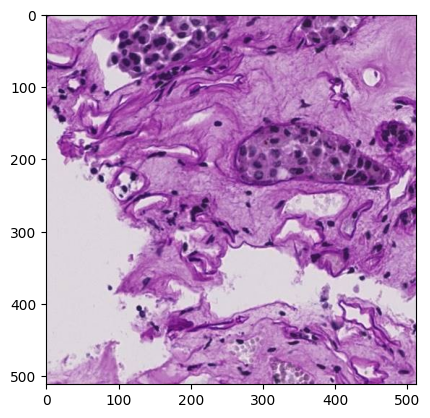

<AxesSubplot: >

In [6]:
show(image_array)

So this is our image, and we need to predict values on this dataset 

# 3 | Train

We also have a training data with us. The train folder only contains the image files in `tif` format. And the anootions are given in the `polygons.jsonl` format 

In [7]:
train_dir = "/kaggle/input/hubmap-hacking-the-human-vasculature/train"

# 4 | Polygons

This is a `json` file that basically contains the annotions to these data points

In [8]:
with open("/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv" , "r") as f:
    k = list(f)
print(k[0])

id,height,width,prediction_string



# 5 | TO DO LIST

```
TO DO 1 : CREATE A DATALOADER 

TO DO 2 : TRAIN A SIMPLE KERAS MODEL

TO DO 3 : ADD WANDB SUPPORT

TO DO 4 : TRAIN A SIMPLE PYTORCH MODEL

TO DO 5 : VISUALIZE THE DATA 

TO DO 6 : TRAIN A HUGGING FACE MODEL(MAYBE YOLO)

TO DO 7 : VISUALIZE THE DATA 

TO DO 8 : DIG IN THE DATA MORE

TO DO 9 : DANCE ON "I LIKE TO MOVE IT MOVE IT"
```

# 6 | Ending 

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK :)**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT !!!! :)**